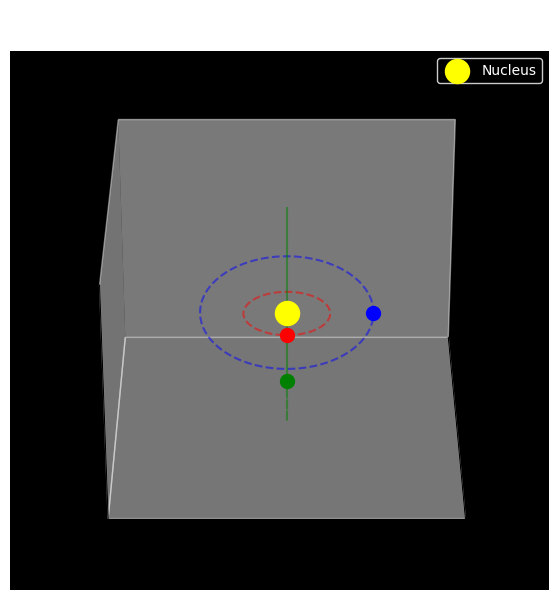

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# --- Create 3D figure ---
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d', facecolor='black')
ax.set_title("3D Atom Model with Rotating Orbitals", color='white', pad=20)

# --- Draw nucleus ---
ax.scatter(0, 0, 0, color='yellow', s=300, label='Nucleus')

# --- Orbit colors and radii ---
orbit_colors = ['red', 'blue', 'green']
orbit_radii = [2, 4, 6]

# --- Define orbit orientations (XY, XZ, YZ planes) ---
orbit_normals = [
    np.array([0, 0, 1]),  # XY-plane
    np.array([1, 0, 0]),  # YZ-plane
    np.array([0, 1, 0])   # XZ-plane
]

# --- Draw orbits ---
theta = np.linspace(0, 2*np.pi, 200)
for color, r, n in zip(orbit_colors, orbit_radii, orbit_normals):
    if np.allclose(n, [0, 0, 1]):  # XY-plane
        x, y, z = r*np.cos(theta), r*np.sin(theta), np.zeros_like(theta)
    elif np.allclose(n, [1, 0, 0]):  # YZ-plane
        x, y, z = np.zeros_like(theta), r*np.cos(theta), r*np.sin(theta)
    else:  # XZ-plane
        x, y, z = r*np.cos(theta), np.zeros_like(theta), r*np.sin(theta)
    ax.plot(x, y, z, color=color, linestyle='--', alpha=0.5)

# --- Create electrons (scatter objects to update later) ---
electrons = [ax.scatter([], [], [], color=color, s=100) for color in orbit_colors]

# --- Set axis properties ---
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_zlim([-8, 8])
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.legend(facecolor='black', edgecolor='white', labelcolor='white')
ax.view_init(elev=30, azim=45)

# --- Animation update function ---
def update(frame):
    for i, (r, n) in enumerate(zip(orbit_radii, orbit_normals)):
        angle = frame * (0.05 + i*0.02)
        if np.allclose(n, [0, 0, 1]):  # XY-plane
            x, y, z = r*np.cos(angle), r*np.sin(angle), 0
        elif np.allclose(n, [1, 0, 0]):  # YZ-plane
            x, y, z = 0, r*np.cos(angle), r*np.sin(angle)
        else:  # XZ-plane
            x, y, z = r*np.cos(angle), 0, r*np.sin(angle)
        electrons[i]._offsets3d = ([x], [y], [z])

    # Rotate the entire view slowly
    ax.view_init(elev=30, azim=frame * 0.6)
    return electrons

# --- Create animation ---
ani = FuncAnimation(fig, update, frames=360, interval=50, blit=False)

# --- Display animation inline in Colab ---
HTML(ani.to_html5_video())
